# Homework 3 Python Problems

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly

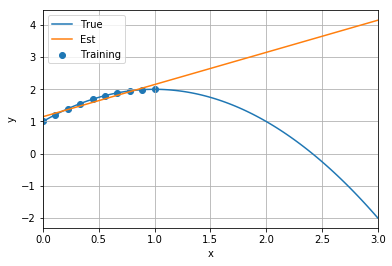

In [29]:
beta0 = np.array([1,2,-1]) # True parameter value
x = np.linspace(0,1,10) # Training values for x
y = poly.polyval(x,beta0) # Training values for y

# Get parameter estimate based on simple linear regression formula
xm = np.mean(x)
ym = np.mean(y)
sxy = np.mean((x-xm)*(y-ym))
sxx = np.mean((x-xm)**2)
betahat1 = sxy/sxx
betahat0 = ym - betahat1*xm

# Plot true function and estimate
xp = np.linspace(0,3,100)
yp0 = poly.polyval(xp,beta0)
yphat = betahat0 + betahat1*xp
plt.plot(xp,np.column_stack((yp0, yphat)), '-')
plt.scatter(x,y)
plt.legend(['True', 'Est', 'Training'], loc='upper left')
plt.grid()
plt.xlim([0,3])
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('bias.png')

## Solution to Problem 1

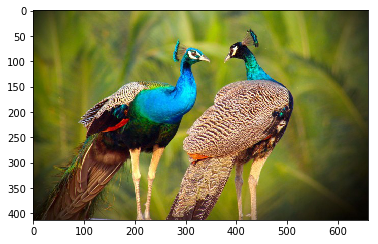

In [30]:
im = plt.imread('birds.jpg')
plt.imshow(im)

In [31]:
ny,nx,ncol = im.shape
npix = ny*nx
X = im.reshape((npix,ncol))

In [34]:
from sklearn.cluster import KMeans

# Number of clusters to test
nc_test = [5,10] 
imhat = []
for nc in nc_test:
    
    # Create a K-means object
    km = KMeans(n_clusters=nc)
    
    # Fit the data.  This may take long
    indhat = km.fit_predict(X)
    
    # Get the approximate image
    cluster = km.cluster_centers_.astype(int)
    Xhat = cluster[indhat,:]
    imhati = Xhat.reshape((ny,nx,ncol))
    imhat.append(imhati)
    
    print('nc=%d completed' % nc)
    

nc=5 completed
nc=10 completed


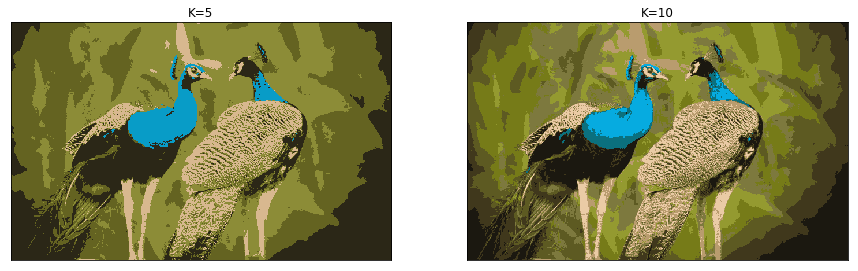

In [35]:
plt.figure(figsize=(15,8))
nplot = len(imhat)
# Plot the images
for iplot, imhati in enumerate(imhat):
    plt.subplot(1,nplot,iplot+1)
    plt.imshow(imhati)
    plt.xticks([])
    plt.yticks([])
    title = ('K=%d' % nc_test[iplot])
    plt.title(title)
    

## Solution to Probem 5

(a) The mean can be computed as follows:

In [36]:
X = np.array([[3,2,1], [2,4,5], [1,2,3], [0,2,5]])
mu = np.mean(X,axis=0)
print(mu)

[1.5 2.5 3.5]


(b) The covariance is:

In [38]:
Xm = X - mu[None,:]  # Subtract the mean from each row
n = X.shape[0]
Q = (1/n)*Xm.T.dot(Xm)
print(Q)

[[ 1.25  0.25 -1.25]
 [ 0.25  0.75  0.75]
 [-1.25  0.75  2.75]]


(c)  Eigenvalues

In [43]:
lam, V = np.linalg.eigh(Q)
print('Eigenvalues:')
print(lam)

print('\nEigenvectors:')
print(V)

Eigenvalues:
[0.01495506 1.1733803  3.56166464]

Eigenvectors:
[[ 0.59363515  0.66677184 -0.45056922]
 [-0.66472154  0.72187235  0.19247228]
 [ 0.45358856  0.18524476  0.87174641]]


(d)  PC representation

In [44]:
x = np.array([1,2,4])
z = V.T.dot(x-mu)
print(z)

[ 0.26233748 -0.60169972  0.56492168]


(e) Approximation error.  The approximation from the first two coefficients is:

In [47]:
xhat = mu + z[0]*V[:,0] + z[1]*V[:,1]
error = np.sum((xhat-x)**2)
print(xhat)
print(error)

[1.25453632 1.89126824 3.50753156]
0.3191364992279563


Note that the approximation error is also:

In [48]:
print(np.sum(z[2:]**2))

0.31913649922795617
